## Define Area of Interest (AOI)

Use the map below to draw a rectangle defining your processing area. The maximum size is approximately 600x600 pixels at 10m resolution.

In [2]:
import openeo
from extractor import load_input_WAC
from inference import inference_WAC


CRS = "EPSG:3035"
RESOLUTION = 10  # important; the resolution is implicitely tied to the CRS; so we need to use UTM based CRS here

SPATIAL_EXTENT = {
    'east': 4806500,
    'south': 2808500,
    'west': 4801500,
    'north': 2813500,
    'crs': CRS
}

TEMPORAL_EXTENT = ['2023-04-01', '2023-08-01'] #Sentinel 1 mosiac needs a buffer of 1 day, here processing for january
MAX_CLOUD_COVER = 85

JOB_OPTIONS = {'driver-memory': '1000m',
 'driver-memoryOverhead': '1000m',
 'executor-memory': '1500m',
 'executor-memoryOverhead': '1500m',
 'python-memory': '8000m',
 'max-executors': 20,
 "udf-dependency-archives": [
        "https://s3.waw3-1.cloudferro.com/swift/v1/project_dependencies/onnx_dependencies_1.16.3.zip#onnx_deps",
        "https://s3.waw3-1.cloudferro.com/swift/v1/project_dependencies/WAC_model_hansvrp.zip#onnx_models"
        ]
 }




In [3]:

connection = openeo.connect("https://openeo.dataspace.copernicus.eu/")
connection.authenticate_oidc()

input_cube = load_input_WAC(connection, SPATIAL_EXTENT, TEMPORAL_EXTENT, MAX_CLOUD_COVER, RESOLUTION, CRS)

#inference_cube = inference_WAC(input_cube)

save_cube = input_cube.save_result(format = "netCDF")
job = connection.create_job(save_cube,
    additional=JOB_OPTIONS,
)

job.start_and_wait()



Authenticated using refresh token.
0:00:00 Job 'j-250523085428482ca9dca2f251ae62f6': send 'start'
0:00:13 Job 'j-250523085428482ca9dca2f251ae62f6': created (progress 0%)
0:00:19 Job 'j-250523085428482ca9dca2f251ae62f6': created (progress 0%)
0:00:25 Job 'j-250523085428482ca9dca2f251ae62f6': created (progress 0%)
0:00:33 Job 'j-250523085428482ca9dca2f251ae62f6': created (progress 0%)
0:00:43 Job 'j-250523085428482ca9dca2f251ae62f6': running (progress N/A)
0:00:56 Job 'j-250523085428482ca9dca2f251ae62f6': running (progress N/A)
0:01:11 Job 'j-250523085428482ca9dca2f251ae62f6': running (progress N/A)
0:01:31 Job 'j-250523085428482ca9dca2f251ae62f6': running (progress N/A)
0:01:55 Job 'j-250523085428482ca9dca2f251ae62f6': running (progress N/A)
0:02:25 Job 'j-250523085428482ca9dca2f251ae62f6': running (progress N/A)
0:03:02 Job 'j-250523085428482ca9dca2f251ae62f6': running (progress N/A)
0:03:49 Job 'j-250523085428482ca9dca2f251ae62f6': running (progress N/A)
0:04:47 Job 'j-250523085428482

<BatchJob job_id='j-250523085428482ca9dca2f251ae62f6'>

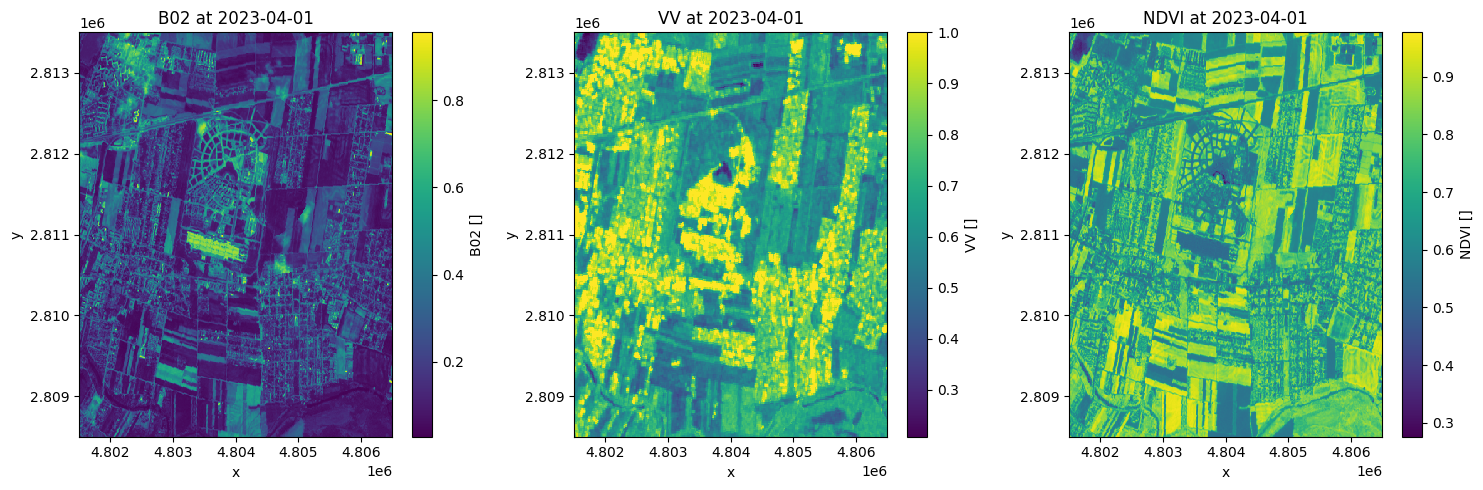

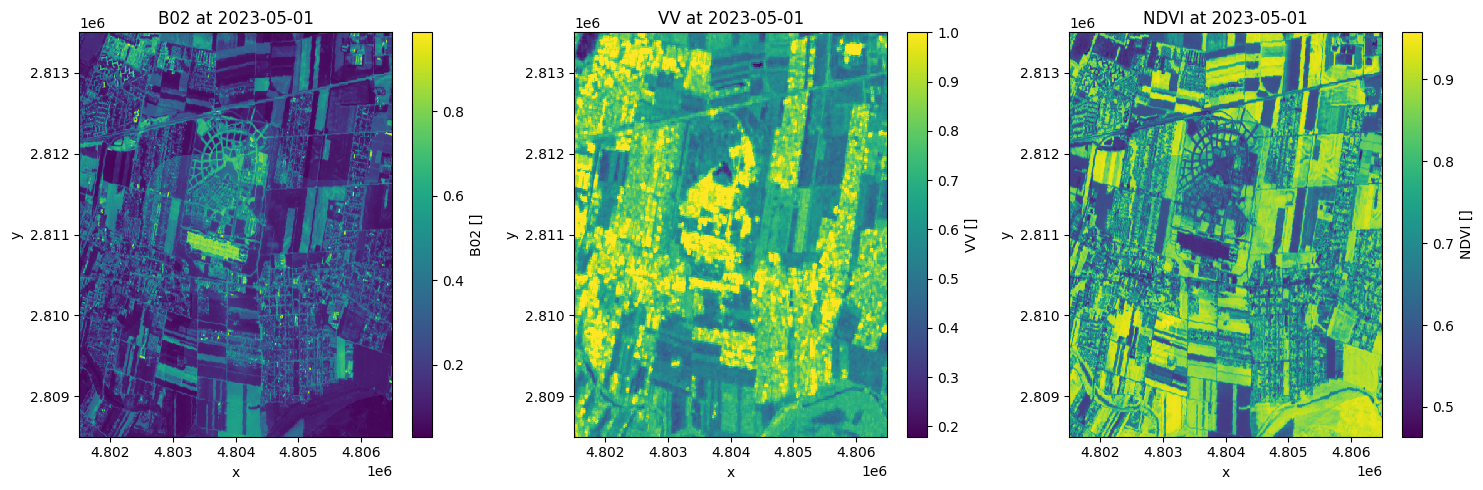

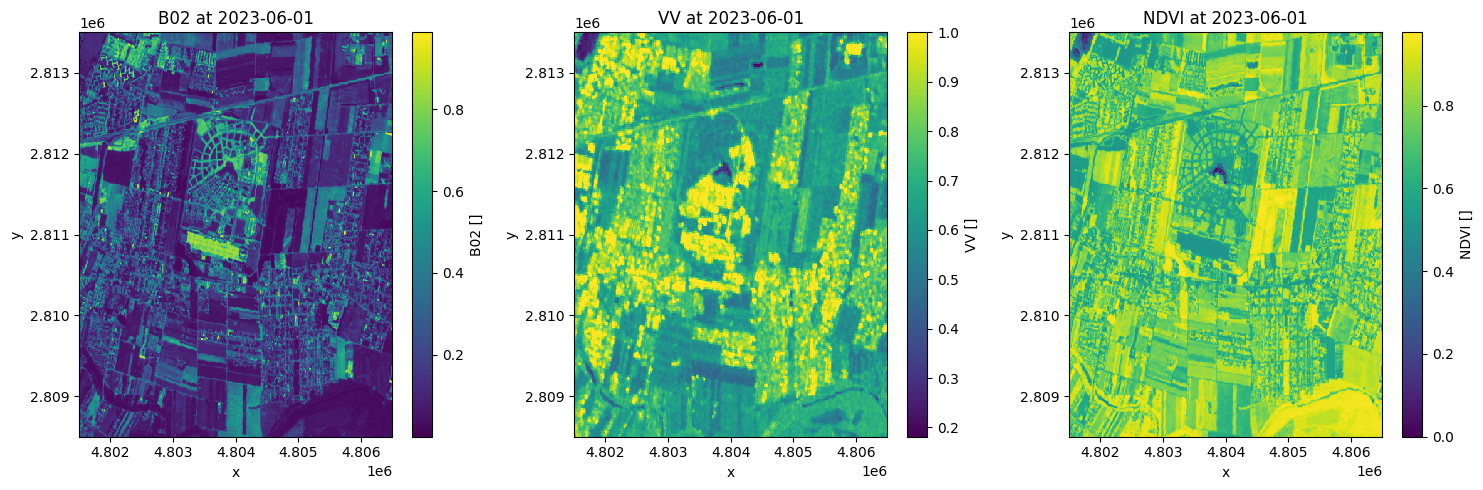

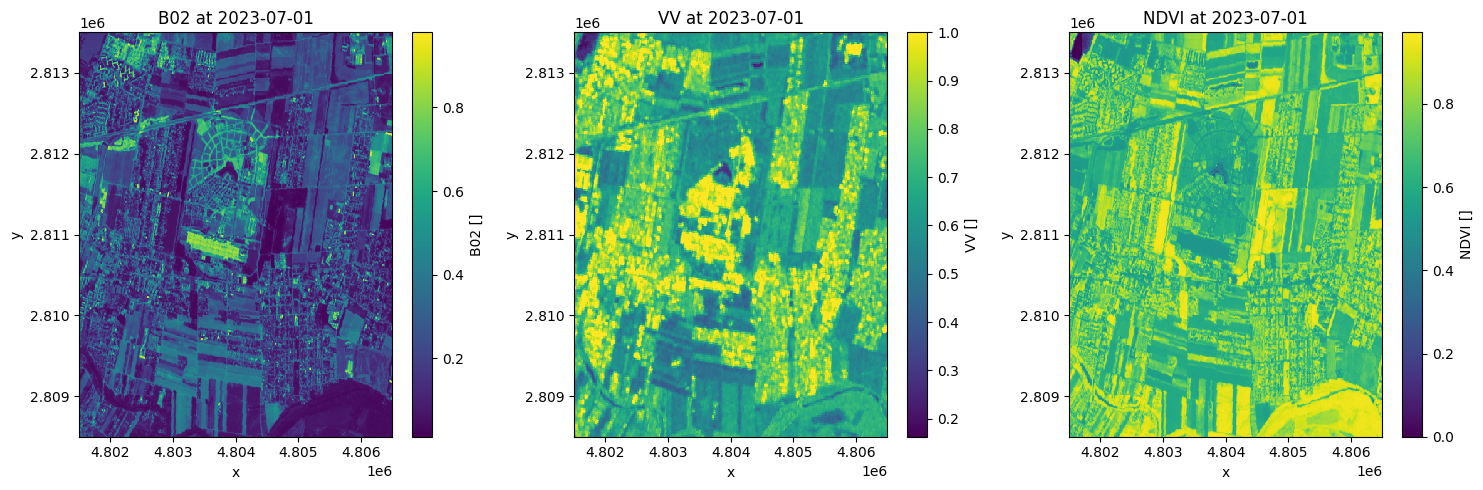

In [12]:
import xarray as xr
import matplotlib.pyplot as plt

results = job.get_results()
#results.download_files("C:/Git_projects/WAC/production/prediction/test")

# Open the NetCDF file
ds = xr.open_dataset(r'C:\Git_projects\WAC\production\prediction\test\openEO.nc')

bands_to_plot = ['B02', 'VV', 'NDVI'] 

# Loop through each timestep
for i, t in enumerate(ds['t']):
    fig, axes = plt.subplots(1, len(bands_to_plot), figsize=(5 * len(bands_to_plot), 5))
    
    for j, band_name in enumerate(bands_to_plot):
        ax = axes[j]
        band = ds[band_name].sel(t=t)
        band.plot(ax=ax, cmap='viridis')
        ax.set_title(f'{band_name} at {str(t.values)[:10]}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
    
    plt.tight_layout()
    plt.show()


In [11]:
ds

<xarray.Dataset> Size: 120MB
Dimensions:  (t: 4, x: 500, y: 500)
Coordinates:
  * t        (t) datetime64[ns] 32B 2023-04-01 2023-05-01 2023-06-01 2023-07-01
  * x        (x) float64 4kB 4.802e+06 4.802e+06 ... 4.806e+06 4.806e+06
  * y        (y) float64 4kB 2.813e+06 2.813e+06 ... 2.809e+06 2.809e+06
Data variables: (12/16)
    crs      |S1 1B ...
    B02      (t, y, x) float64 8MB ...
    B03      (t, y, x) float64 8MB ...
    B04      (t, y, x) float64 8MB ...
    B05      (t, y, x) float64 8MB ...
    B06      (t, y, x) float64 8MB ...
    ...       ...
    NDVI     (t, y, x) float64 8MB ...
    VV       (t, y, x) float64 8MB ...
    VH       (t, y, x) float64 8MB ...
    DEM      (t, y, x) float64 8MB ...
    lon      (t, y, x) float64 8MB ...
    lat      (t, y, x) float64 8MB ...
Attributes:
    Conventions:  CF-1.9
    institution:  Copernicus Data Space Ecosystem openEO API - 0.66.0a3.dev20...
    description:  
    title: